## Import thư viện

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import cdist
import random

## Dataset

In [2]:
points = np.array([
    [1.0,1.0], #P1
    [1.2,1.1], #P2
    [0.9,0.8], #P3
    [8.0,8.1], #P4
    [8.1,7.9], #P5
    [4.0,1.0], #P6
    [4.2,1.2], #P7
    [8.3,8.2], #P8
])

## Vẽ biểu đồ k-distance plot

##### Chọn k = MinPoints - 1

In [3]:
k = 2

#### Tính khoảng cách

In [4]:
labels = ["P1","P2","P3","P4","P5","P6","P7","P8"]

In [5]:
dist_matrix = np.round(cdist(points, points), 3)
np.fill_diagonal(dist_matrix, np.inf)
df = pd.DataFrame(dist_matrix, columns=labels, index=labels)
print(df.to_markdown())

|    |      P1 |      P2 |      P3 |      P4 |      P5 |      P6 |      P7 |      P8 |
|:---|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|
| P1 | inf     |   0.224 |   0.224 |   9.97  |   9.901 |   3     |   3.206 |  10.253 |
| P2 |   0.224 | inf     |   0.424 |   9.759 |   9.688 |   2.802 |   3.002 |  10.041 |
| P3 |   0.224 |   0.424 | inf     |  10.183 |  10.112 |   3.106 |   3.324 |  10.465 |
| P4 |   9.97  |   9.759 |  10.183 | inf     |   0.224 |   8.149 |   7.877 |   0.316 |
| P5 |   9.901 |   9.688 |  10.112 |   0.224 | inf     |   8.026 |   7.752 |   0.361 |
| P6 |   3     |   2.802 |   3.106 |   8.149 |   8.026 | inf     |   0.283 |   8.386 |
| P7 |   3.206 |   3.002 |   3.324 |   7.877 |   7.752 |   0.283 | inf     |   8.112 |
| P8 |  10.253 |  10.041 |  10.465 |   0.316 |   0.361 |   8.386 |   8.112 | inf     |


#### Sắp xếp khoảng cách

In [6]:
k_distances = np.sort(dist_matrix, axis=1)[:, k-1]
sorted_k = np.sort(k_distances)

print(k_distances)
print(sorted_k)

[0.224 0.424 0.424 0.316 0.361 2.802 3.002 0.361]
[0.224 0.316 0.361 0.361 0.424 0.424 2.802 3.002]


#### Vẽ biểu đồ k-distance plot

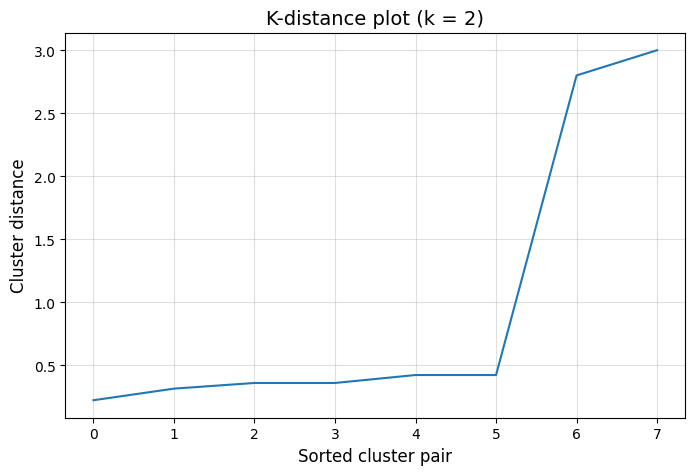

In [7]:
plt.figure(figsize=(8,5))
plt.plot(sorted_k)
plt.xlabel("Sorted cluster pair", fontsize=12)
plt.ylabel("Cluster distance", fontsize=12)
plt.title(f"K-distance plot (k = {k})", fontsize=14)
plt.grid(True, alpha=0.4)

plt.show()

## Vẽ biểu đồ epsilon-neighbor


#### Giá trị Epsilon

In [8]:
eps = 0.5

#### Vẽ Scatter plot

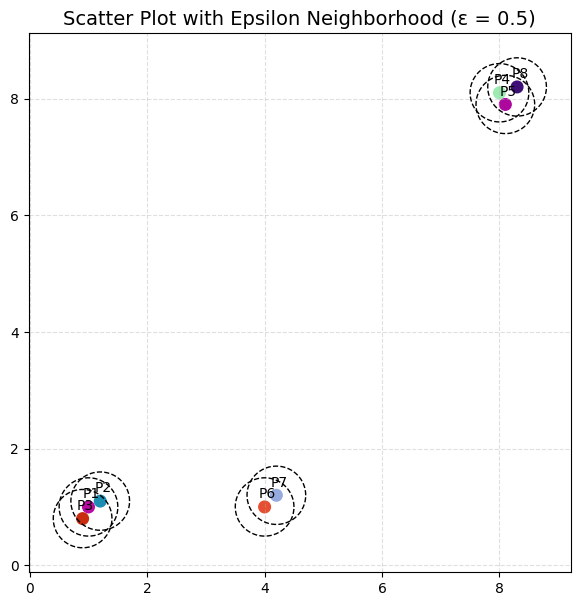

In [9]:
# Random màu
colors = []
for _ in range(len(points)):
    colors.append(np.random.rand(3,))

# Vẽ Scatter Plot
plt.figure(figsize=(7,7))
plt.scatter(points[:,0], points[:,1], c=colors, s=70)

# Label từng điểm
for i, (x, y) in enumerate(points):
    plt.text(x-0.1, y+0.15, labels[i], fontsize=10)

# Vẽ epsilon-neighborhood
theta = np.linspace(0, 2*np.pi, 200)
circle_x = eps * np.cos(theta)
circle_y = eps * np.sin(theta)

for x, y in points:
    plt.plot(x + circle_x, y + circle_y, 'k--', linewidth=1)

plt.title("Scatter Plot with Epsilon Neighborhood (ε = 0.5)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)

plt.show()